In [1]:
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
from scipy.ndimage import gaussian_filter1d
import os
import pandas as pd
from math import isnan
import random
import glob
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    resPath = extSSDpath + getProjectFoldername() + '/gillespie_sim_ci/results'
else:
    resPath = '/results'
    print('Forgot the SSD!!!!!')

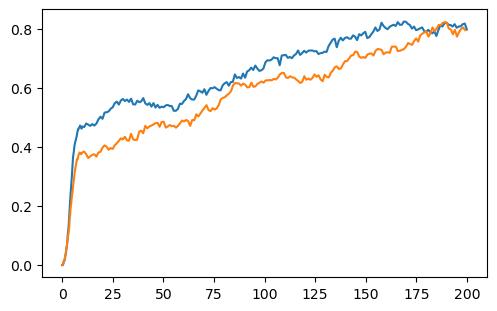

In [43]:
pis, qs = [0.1, 0.1], [9.0, 10.0]
pichain = '_'.join([str(pi) for pi in pis])
qchain = '_'.join([str(q) for q in qs])

# fig, ax = plt.subplots()
goldenRatio = 1.61803
height = 3
fig, ax = plt.subplots(1, 1, figsize=(height*goldenRatio, height), constrained_layout=True)

# other tests:
i = 22
l, lci = 0.9, 1.0

ci_kwargs_list = [ [1, 0.3, 500.0], [1, 0.5, 500.0]]
for ci_kwargs in ci_kwargs_list:
    ci_kwargs_chain = '_'.join([str(cikw) for cikw in ci_kwargs])
    df = pd.read_csv(f'sim_results_evos_pis_{pichain}_qs_{qchain}_l_{l}_lci_{lci}_cikw_{ci_kwargs_chain}_N_1000_ic_N/time_evo_rea_{i}.csv')
    # dftss = pd.read_csv(f'{resPath}/tss_from_sim_results_evos_pis_{pichain}_qs_{qchain}_l_{l}_lci_{lci}_cikw_{ci_kwargs_chain}_N_1000_ic_N.csv')
    ax.plot(df['time'], df['f2'])

In [29]:
for ci_kwargs in ci_kwargs_list:
    f2winAvg = []
    ci_kwargs_chain = '_'.join([str(cikw) for cikw in ci_kwargs])
    for i in range(100):
        df = pd.read_csv(f'{resPath}/sim_results_evos_pis_{pichain}_qs_{qchain}_l_{l}_lci_{lci}_cikw_{ci_kwargs_chain}_N_1000_ic_N/time_evo_rea_{i}.csv')
        if df['f2'].iloc[-1] > df['f1'].iloc[-1]:
            f2winAvg.extend(list(df['f2'].iloc[-20:]))
    f2winAvg = np.average(f2winAvg)
    print(ci_kwargs, f2winAvg)

[1, 0.3, 500.0] 0.8903152173913044
[1, 0.5, 500.0] 0.8695335


In [53]:
ic = 'p40-0-60'
ic = 'N'

for ci_kwargs in [[1, 0.3, 500.0], [1, 0.5, 500.0]]:
    ci_kwargs_chain = '_'.join([str(cikw) for cikw in ci_kwargs])
    f2winAvg = []
    for i in range(20):
        df = pd.read_csv(f'sim_results_evos_pis_{pichain}_qs_{qchain}_l_{l}_lci_{lci}_cikw_{ci_kwargs_chain}_N_1000_ic_{ic}/time_evo_rea_{i}.csv')
        if df['f2'].iloc[-1] > df['f1'].iloc[-1]:
            f2winAvg.extend(list(df['f2'].iloc[-20:]))
    f2winAvg = np.average(f2winAvg)
    print(f2winAvg)

0.8889636363636364
0.8890045454545455


# Simulations in numba vs not numba

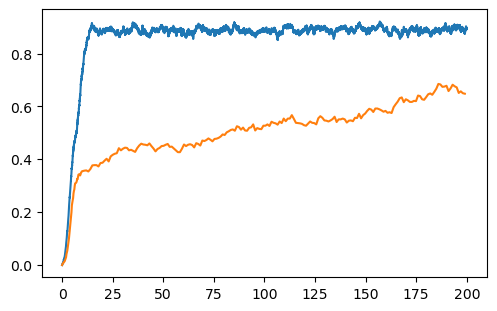

In [51]:
pis, qs = [0.1, 0.1], [9.0, 10.0]
pichain = '_'.join([str(pi) for pi in pis])
qchain = '_'.join([str(q) for q in qs])

# fig, ax = plt.subplots()
goldenRatio = 1.61803
height = 3
fig, ax = plt.subplots(1, 1, figsize=(height*goldenRatio, height), constrained_layout=True)

# other tests:
i = 15
l, lci = 0.9, 1.0

ci_kwargs = [1, 0.5, 500.0]
ci_kwargs_chain = '_'.join([str(cikw) for cikw in ci_kwargs])
df1 = pd.read_csv(f'sim_results_evos_pis_{pichain}_qs_{qchain}_l_{l}_lci_{lci}_cikw_{ci_kwargs_chain}_N_1000_ic_N/time_evo_rea_{i}.csv')
ax.plot(df1['time'], df1['f2'])
df2 = pd.read_csv(f'numba_sims/sim_results_evos_pis_{pichain}_qs_{qchain}_l_{l}_lci_{lci}_cikw_{ci_kwargs_chain}_N_1000_ic_N/time_evo_rea_{i}.csv')
ax.plot(df2['time'], df2['f2'])